In [254]:
fig_dir = "../../figures/"
fig_ext = "pdf"

In [23]:
from minke import sources

In [2]:
import matplotlib.pyplot as plt
import thesis
%matplotlib inline

In [32]:
from gwpy.timeseries import TimeSeries

In [237]:
source_list = [sources.Gaussian(duration = 0.01, hrss = 1e-21, time = 100 ),
           sources.SineGaussian(q=8, frequency=100, hrss=1e-21, time=100, polarisation='linear'),
           sources.WhiteNoiseBurst(duration=0.05, bandwidth=1000, frequency=1000, hrss=1e-21, time=100),
               #sources.BBHRingdown(time=100, phi0=0, mass=20, spin=0, massloss=4, distance=100, inclination=0)
          ]

It appears that your installation of LALSuite does not support NR data in burst injections.


It appears that your installation of LALSuite does not support NR data in burst injections.
3441
It appears that your installation of LALSuite does not support NR data in burst injections.
4381
It appears that your installation of LALSuite does not support NR data in burst injections.
17203


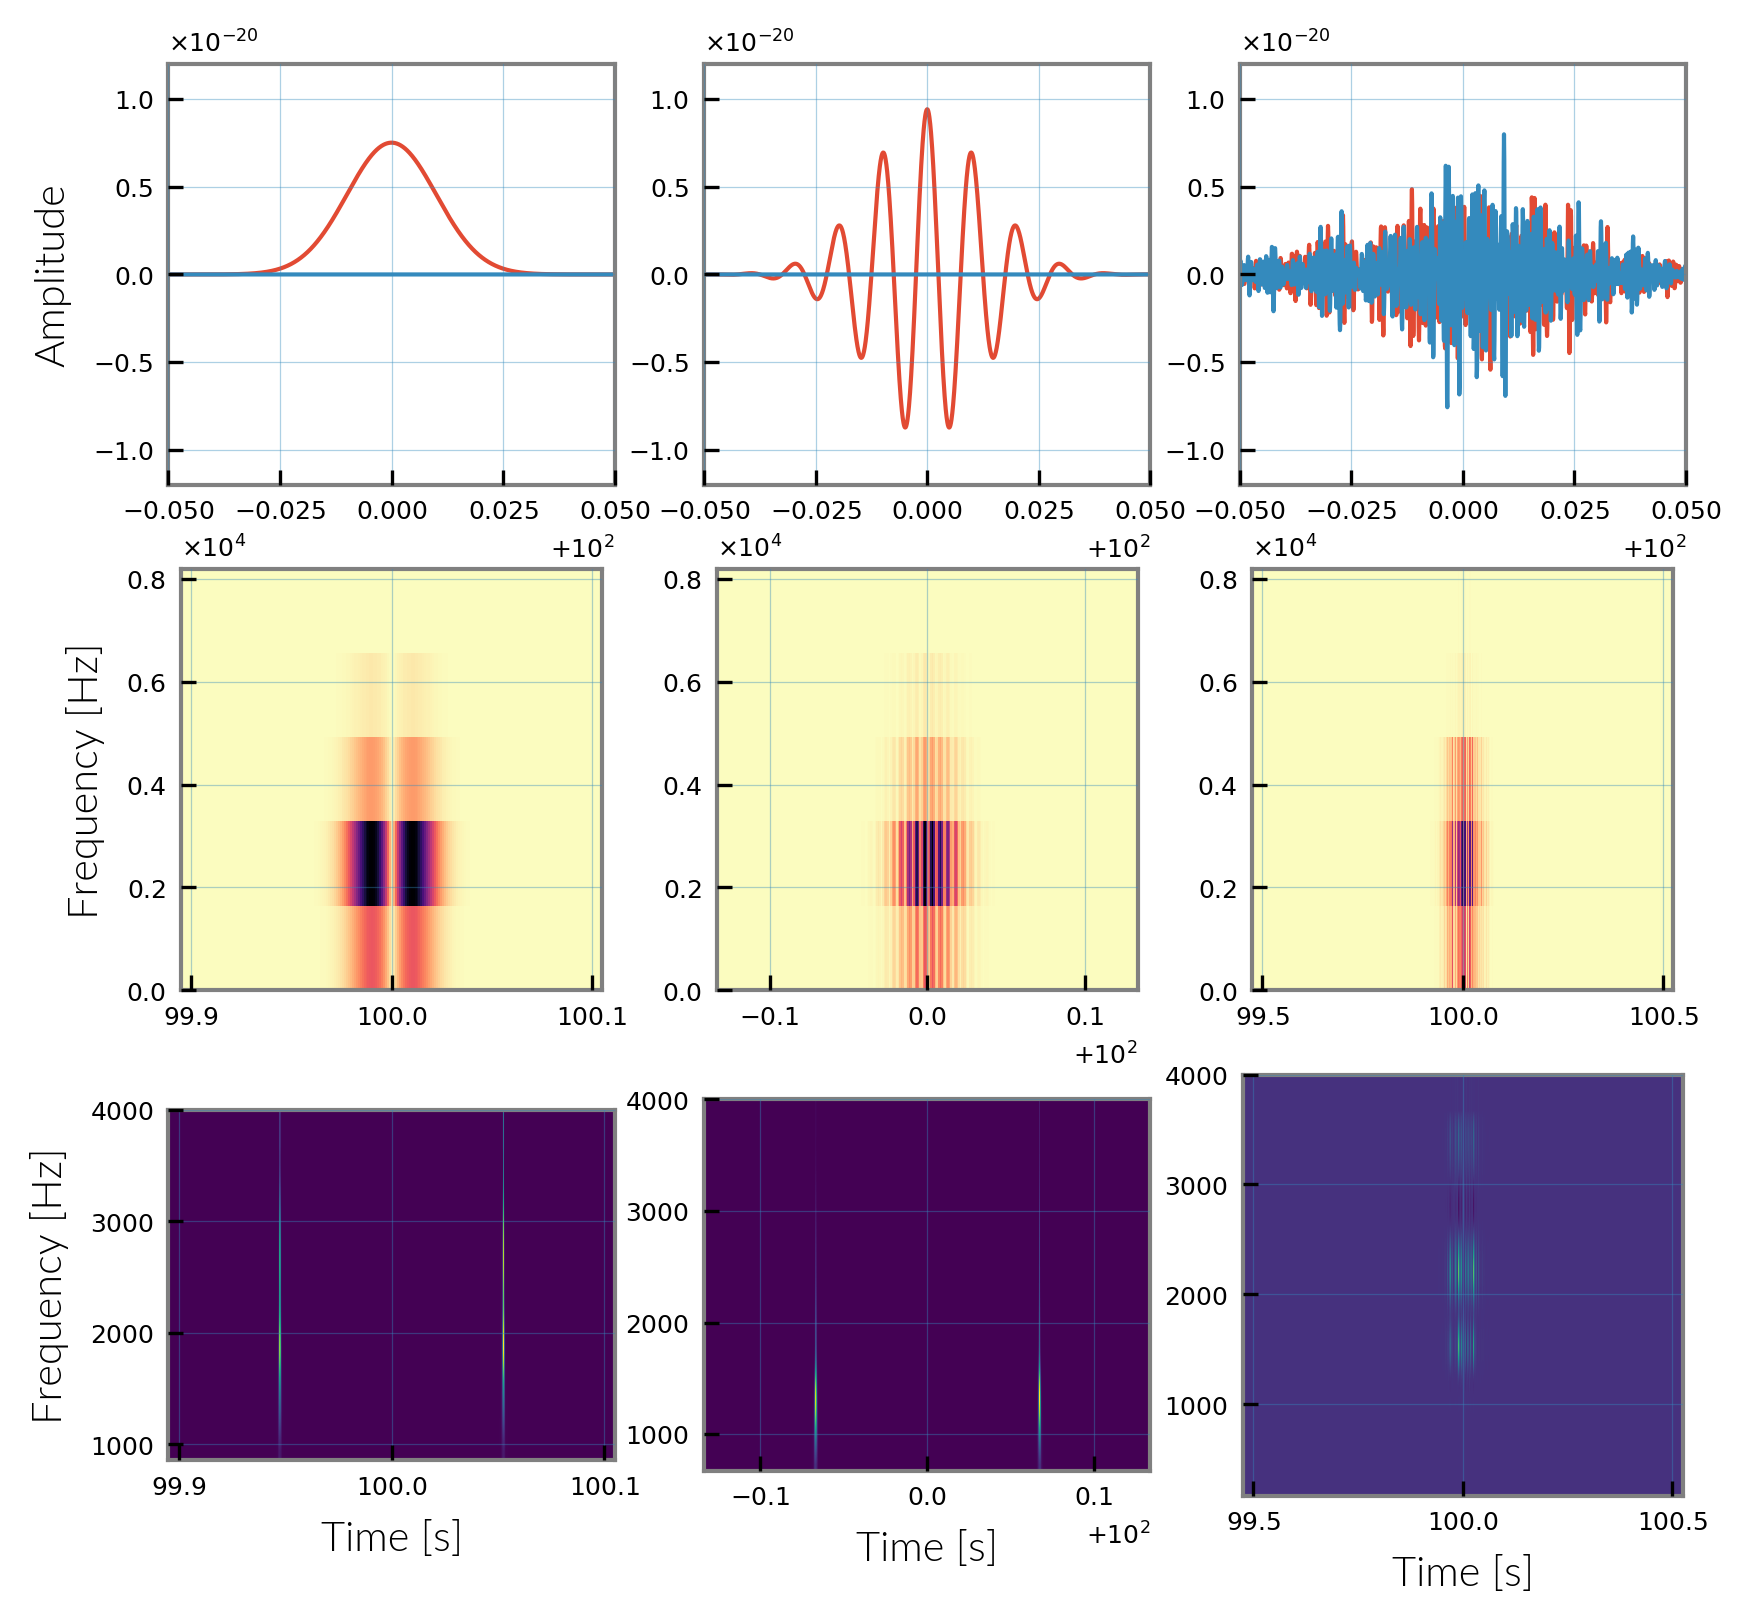

In [259]:
f, ax = plt.subplots(3,len(source_list), dpi=300)

for i, source in enumerate(source_list):
    data = source._generate()
    print(len(data[0].data.data))
    data_gw_p = TimeSeries(data = data[0].data.data, t0=data[0].epoch, dt = data[0].deltaT)
    data_gw_c = TimeSeries(data = data[1].data.data, t0=data[1].epoch, dt = data[1].deltaT)
    ax[0,i].plot(data_gw_p.times.value, data_gw_p.value, lw=1)
    ax[0,i].plot(data_gw_c.times.value, data_gw_c.value, lw=1)
    
    specgram = data_gw_p.spectrogram(0.001, fftlength=0.0005, overlap=0.00025)** (1/2.)
    ax[1,i].imshow(specgram.value.T,
            #np.log(specgram.value.T), 
                   aspect=(data_gw_p.times.value[-1] - data_gw_p.times.value[0]) / specgram.frequencies.value[-1], 
                   origin="lower", 
                   cmap = "magma_r",
                   extent=(data_gw_p.times.value[0], data_gw_p.times.value[-1], specgram.frequencies.value[0], specgram.frequencies.value[-1]))
    
    qt = data_gw_p.q_transform(whiten=False, qrange=[4,32], frange=[0,4000])
    ax[2,i].imshow(qt.value.T, origin='lower', 
                   cmap="viridis",
           aspect=(data_gw_p.times.value[-1] - data_gw_p.times.value[0]) / qt.frequencies.value[-1], 
           extent=(data_gw_p.times.value[0], data_gw_p.times.value[-1], qt.frequencies.value[0], qt.frequencies.value[-1])
    )
    if i<3: ax[0,i].set_ylim([-1.2e-20, 1.2e-20])
    if i<3: ax[0,i].set_xlim([99.95, 100.05])
    
    ax[2,i].set_xlabel("Time [s]")

ax[2,0].set_ylabel("Frequency [Hz]")
ax[1,0].set_ylabel("Frequency [Hz]")
ax[0,0].set_ylabel("Amplitude")
    
        
thesis.thesisify(f, height=1.5);
f.subplots_adjust(wspace=0.2, hspace=0.2)



f.savefig("{}/sources/minke-adhoc.{}".format(fig_dir, fig_ext))
